In [2]:
"""
지난시간에는 검색엔진에서 제공하는 데이터 분석  (약 1400행 가량)
이번에는 고객데이터 분석!  --> 4만개 행 이상 (대량)
이 정도의 데이터를 어떻게 분석할지 진행해봅니다.
"""
None

# 고객 데이터 분석
### 데이터 출처 : UCI Machine Learning Repository

[링크주소 및 다운로드]https://archive.ics.uci.edu/ml/datasets/bank+marketing
<br>

#### Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31

In [3]:
# 위 링크 -->  상단 [Data Folder]  --> bank-additional.zip 다운로드
# 그 안에서 bank-additional-full.csv  (가장 용량큰 파일) 을 압축 풀어서 예제에서 사용하겠습니다.

# <예제 데이터 소개>
- 해외의 은행이 진행한 마케팅 데이터
- 아웃바운드 텔레마케팅으로 마케팅 캠페인을 진행
- 아래의 5가지 (21개 컬럼) 으로 구성됨

In [10]:
# ,csv  파일을 열어보자

# bank client data:  은행고객 데이터

나이, 직업, 결혼여부, 교육수준, 파산여부, 주택대출여부, 개인대출여부

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

# related with the last contact of the current campaign:

캠페인의 마지막 컨택 관련 데이터

컨택한기기 타입 / 컨택한 월 / 컨택한 요일 / 통화시간


8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
# other attributes:

이번 캠페인에서 몇번이나 컨택 되었는지 / 이후 몇일 지났는지 / 이전 캠페인에서 몇번이나 컨택되었는지 / 


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
# social and economic context attributes

사회 경제적 속성 데이터

고용변동률 , 소비자물가지수, 소비자신뢰지수, 유리보3개월금리, 취업자수


16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

# Output variable:

은행상품 가입여부

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [2]:
import matplotlib.pyplot as plt

In [3]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

# 1. 데이터불러오기
1. 파일명 : bank-additional-full.csv
1. csv 파일을 읽어와서 df 변수에 담고, 상위 5개 모양을 확인해보세요
    - hint : **sep=** 옵션을 주어야 제대로 읽어오게 될겁니다.

[예시]
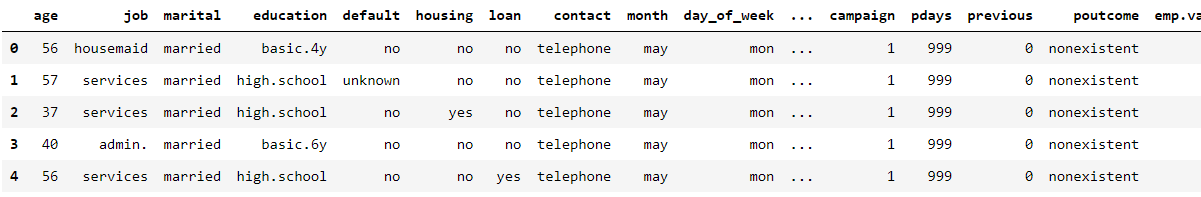

In [4]:
filepath = r'C:\dataset\ex1_01_광고 데이터를 활용한 데이터 분석\Data\bank-additional-full.csv'

In [18]:
# window 방법1 : \\
# engine='python' - 에러 반환시, 디렉토리 혹은 파일명에 한글이 있을 경우 추가

# df=pd.read_csv('../Data/bank-additional-full.csv', engine='python')
df=pd.read_csv('../Data/bank-additional-full.csv')

In [ ]:
#window 방법2 : /
df=pd.read_csv('C:/Users/bank-additional-full.csv',
                 engine='python')

In [ ]:
#window 방법# : r
df=pd.read_csv(r'C:/Users/bank-additional-full.csv',
                 engine='python')

In [ ]:
#mac
df=pd.read_csv('/users/junghs/bank-additional-full.csv')

In [19]:
#head()
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [20]:
# ↑ 관찰
# 어?  데이터가 제대로 읽혀온거 같지 않다.. 왜??

- 엑셀로 데이터를 열었을 때의 화면
- **콜론**으로 구분된 데이터<br>
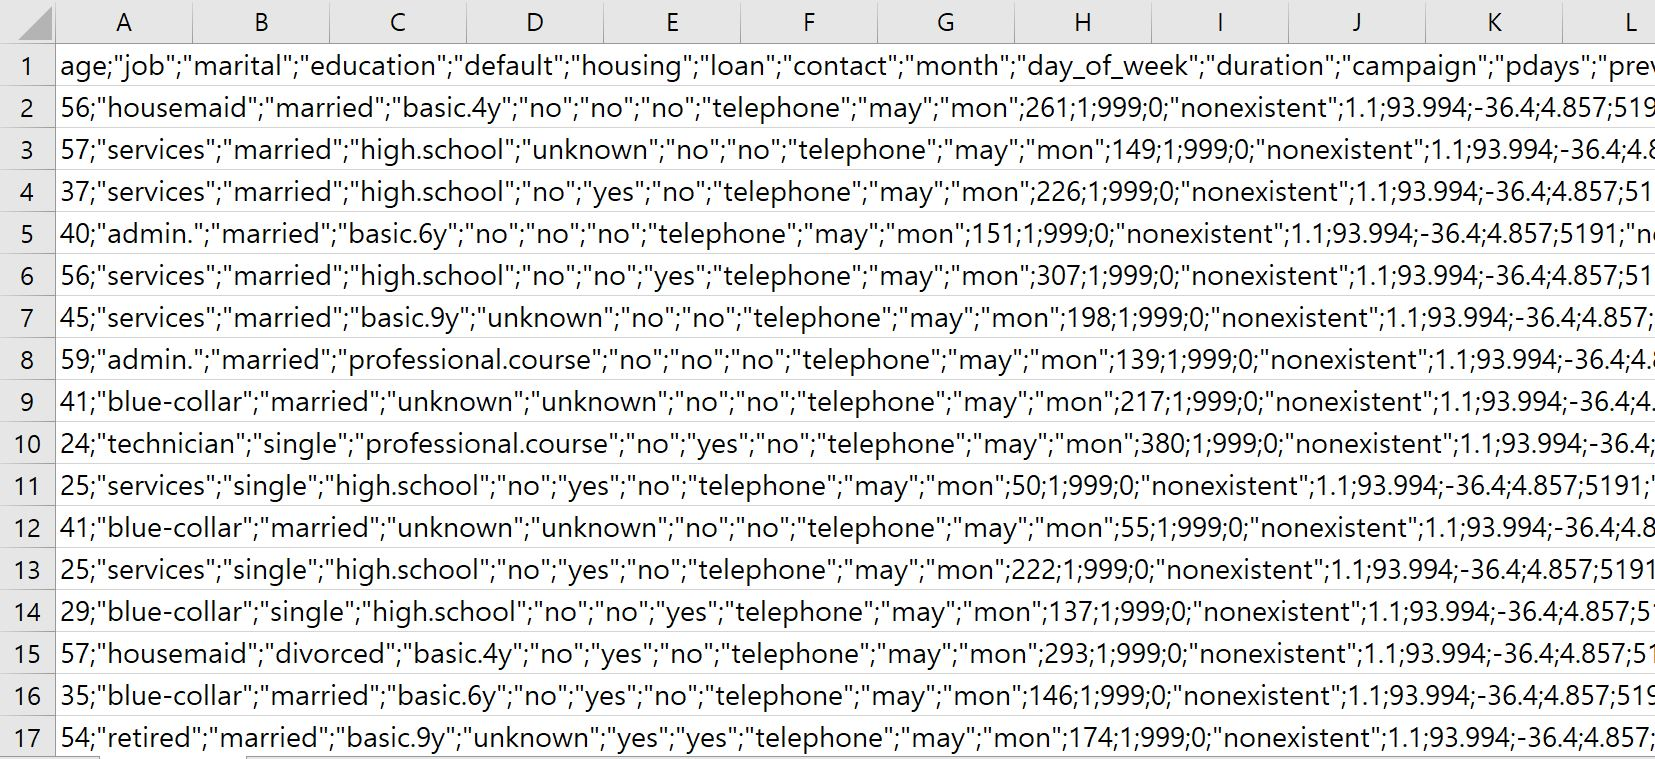

In [5]:
# sep=  사용한다!

#window
#sep = ';'
# df=pd.read_csv('../Data/bank-additional-full.csv', engine='python',sep=';')
# df=pd.read_csv('../Data/bank-additional-full.csv', sep=';')
df=pd.read_csv(filepath, sep=';')

In [ ]:
#mac
#sep = ';'


In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. 데이터 탐색하기
1. 기본적인 EDA 를 수행하세요
    - head, tail, shape, 
    - 결측치, 기술통계량
    - 분류형 데이터의 경우 열의 고유값, 고유값 빈도 등도 확인하세요

In [28]:
# (복습) 데이터 탐색을 해보는 함수들을 '다시' 보고 실습해봅니다

In [31]:
# 데이터를 가져오면 기본적으로 head, tail, shape, 결측치, 기술통계량 등을 확인해봐야 한다

In [25]:
#head - 데이터의 첫 5행, default : 5행
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
#tail - 데이터의 끝 5행, default : 5행
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [30]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# 결측치 확인

In [33]:
# 결측치 확인    # 각각의 데이터가 결측치인지 아닌지 True / False 로 확인해줌
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# ↑ 그런데 위와 같이 하면 데이터가 많은 경우 확인하기 어렵다.  그래서 sum() 을 해줍니다.

# 결측치 확인 - 열단위

df.isnull().sum()

# ↓ 일단 해당 데이터에는 결측치가 없다.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [36]:
#shape - dataframe의 크기(행, 열의 수)
df.shape

(41188, 21)

In [37]:
#describe() - 각 열에 대한 기술통계량
#데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [38]:
#columns - 칼럼명 반환

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [39]:
#unique() - 열의 고유값
#education
df['education']

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41188, dtype: object

In [40]:
# educatoin  열의 고유값
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [41]:
#value_counts() - 열의 고유값 빈도
#education
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [43]:
df.groupby('education').size()   # 참고로 groupby 로도 가능

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

In [44]:
df.groupby('education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,,,,,,,,,,
basic.4y,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
basic.6y,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
basic.9y,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
high.school,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515
illiterate,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
professional.course,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243
university.degree,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168
unknown,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731


In [45]:
#unique() - 열의 고유값
#marital
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [46]:
#value_counts() - 열의 고유값 빈도
#marital
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [47]:
# 위의 함수들은 데이터 탐색 과정에서 굉장히 자주 쓰이는 함수들입니다!
# 데이터 분석전, 머신러닝 전에 꼭 확인해보셔야 하는 부분들입니다.

# 전체적으로 데이터를 파악하고 데이터와 '친해지는' 시간이 필요합니다.
# 데이터에 대한 인사이트 를 얻기 위해서도 필요합니다.

# 데이터 시각화

- 학습목표:
    1. 현업의 데이터를 사용하여 데이터 시각화를 실습
    2. 데이터를 가공, 처리하여 시각화 진행

# 3_1 나이(age) 오름차순으로 시각화 하기
- 총 41188 명의 age 가 있다.  이를 시각화하여 age 분포를 확인해보자

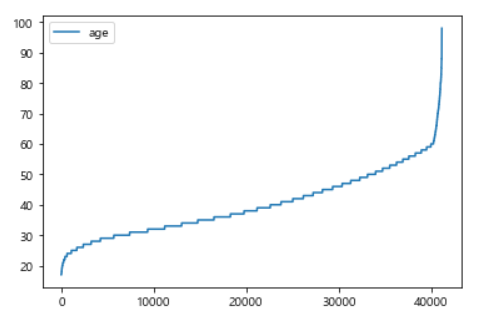

In [8]:
# 나이 컬럼
df['age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64

In [49]:
# '시각화' 가 필요한 이유 --> 데이터가 너~ 무 많기 때문에 한눈에 '형태'를 보기 어렵다.
# '시각화' 를 통해 데이터 패턴, 데이터 모양새를 파악해야 한다.

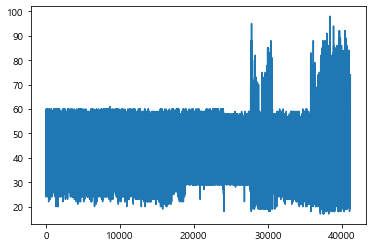

In [9]:
df['age'].plot()
plt.show()
#x축이 인덱스 순서

In [51]:
# ↑ 그러나 위와 같이 그래프를 출력하니까 데이터 패턴도 파악하기 어렵고  
#  어떠한 인사이트도 얻을수 없습니다.
#  위 그래프릐 x 축은 df 의 index 순서 이기 때문에 ...  

# 전체적인 데이터 패턴을 파악하기 위해서는 데이터 정렬 후에 그래프 출력해보면 전체적인 데이터 패턴을 알수 있을 것이다!

- age 칼럼 선그래프 그리기(오름차순)
 1. 노출수칼럼을 수치 순서대로 오름차순 정렬
 2. 정렬된 데이터(시리즈)의 형태대로 인덱스 재생성 

In [10]:
#오름차순 정렬
#age칼럼 
age=df['age'].sort_values()

In [11]:
#age변수출력
age

38274    17
37579    17
37539    17
37140    17
37558    17
         ..
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [54]:
# 오름차순된 대로 인덱스도 재생성 해주어야 한다.
# 그래야 오름차순으로 데이터가 출력된다.

In [12]:
#reset_index - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
age = age.reset_index()   # 결과가 DataFrame 으로 나온다

In [13]:
#age 변수출력
age    # 인덱스 재생성되고 기존의 인덱스틑 index 열로 바뀜

,index,age
0,38274,17
1,37579,17
2,37539,17
3,37140,17
4,37558,17
...,...,...
41183,40450,92
41184,38921,94
41185,27826,95
41186,38455,98


In [14]:
#drop(axis=1) - 삭제(열 기준)
age = age.drop('index', axis=1)

In [15]:
#age 변수출력
age

,age
0,17
1,17
2,17
3,17
4,17
...,...
41183,92
41184,94
41185,95
41186,98


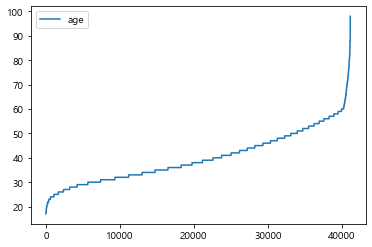

In [60]:
#plotting
#값의 오름차순별로 정렬한 그래프
age.plot()
plt.show()

In [ ]:
# ↑ 결과
# age 데이터의 분표 형태를 알수 있다.

# 대체로 보면, 20대 ~ 60대 사이의 분포가 많은 것을 알수 있다. 

In [61]:
#보통 '나이'를 20대,30대,40..대로 나누어 데이터를 확인함

# '나이' 의 경우 어떤 구간 별로 데이터를 나누어서 확인하곤 함.
# 그런 경우에는 히스토그램으로 그려서 파악하면 데이터 패턴을 파악하기 쉽다

# 3_2. 나이(age) 구간별, 분포형태 시각화하기
- 나이대별 히스토그램을 시각화하기

[예시]
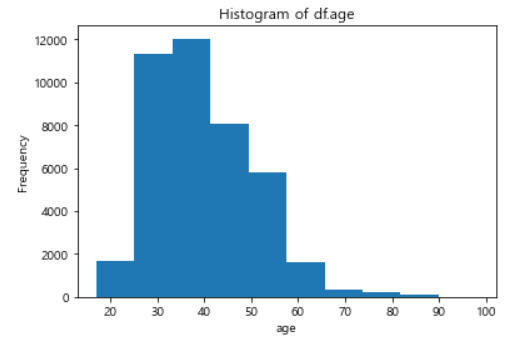

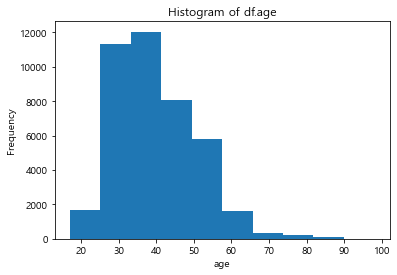

In [20]:
#계급간 빈도를 나타내주는 히스토그램
df['age'].plot.hist()
plt.title('Histogram of df.age',fontsize=12)
plt.xlabel("age")
plt.show()

In [ ]:
# ↑  간단하게 히스토그램을 만들수 있긴 하다.

# 그러나 이 히스토 그램을 보기 좋게 옵션을 줌.

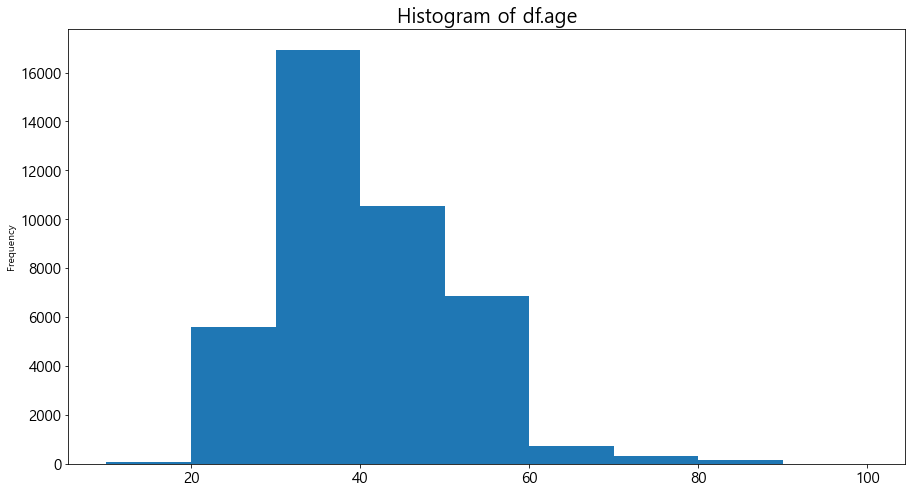

In [7]:
#히스토그램
#bins - 계급구간(10,20,30...100)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.age',fontsize=20)

df['age'].plot.hist(bins=range(10,101,10),figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.age',fontsize=20)
plt.show()

In [68]:
# 이상 'age' 나이대별로 히스토그램을 그려 보았는데
# 그와 비슷하게 히스토그램으로 그려볼만한 데이터가 있습니다.

# 바로 dutation (전화통화시간) 입니다.  이를 히스토그램으로 그려보면. 

# 3_3. 통화시간(dutation) 분포 확인하기
- 통화시간(duration) 을 histogram 시각화 하여 분포 확인하기
- 오름차순 정렬
- duration 의 범위값을 반영하여 histogram 의 bins 옵션을 주기 (100 단위로 구간 설정)

[예시]
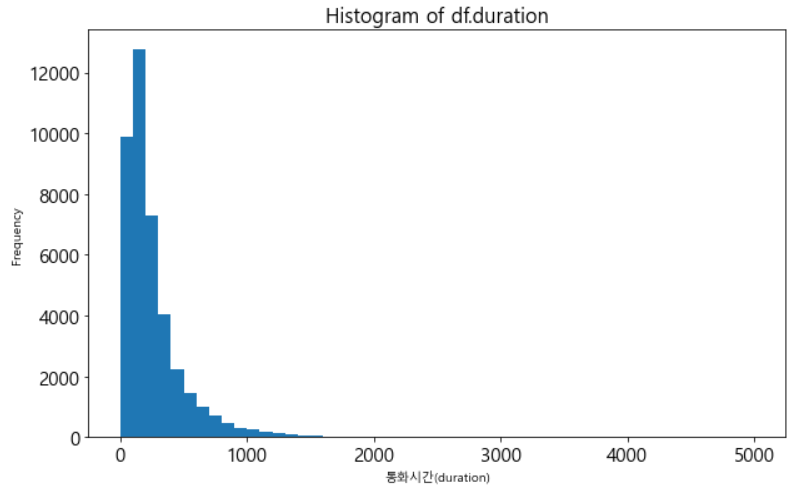

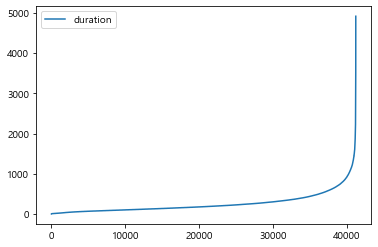

In [69]:
#시각화 예제2 : duration(전화통화시간) 선 그래프 시각화
(((df['duration'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()
#1. 선그래프로 데이터의 패턴 분석
#2. 히스토그램으로 전화통화 시간별 빈도 분석

In [70]:
# ↑ 관찰 일단 이와 같이 선 그래프로 시각화
# 일부의 수치만 높은 수치를 갖는다는 사실을 알수 있습니다.  대부분은 낮은 수치(통화시간)에 머물로 있다.
# 이렇게 선그래프로 확인가능하나
# 먼저 age 때와 마찬가지로 histogram으로 그려 보겠습니다

# bins 계급구간을 설정해야 하는데.  어떻게 계급구간을 설정하면 좋은가?  (나이는 10대, 20대 로 한다손 쳐도.. 하지만..)
# 그래서 기술통계량을 통해 알아보겠습니다

In [71]:
#히스토그램의 계급구간을 설정하기 위한 최소값, 최대값 파악
#describe()
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [72]:
# ↑ 최솟값이 0,  최댓값 : 4918  (거의 5000)

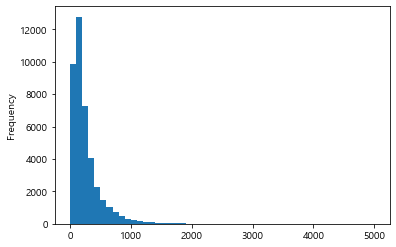

In [73]:
#bins=range(0,5000,100)
df['duration'].plot.hist(bins=range(0, 5001, 100))
plt.show()

In [ ]:
# ↑ 결과
# 각 계급구간마다 0, 100 , 200 ..  의 통화시간의 계급을 설정

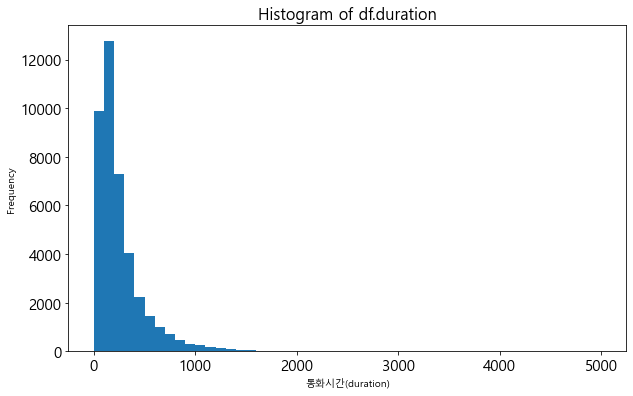

In [23]:
#히스토그램
#bins - 계급구간(0,100,200...5000)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.duration',fontsize=20)

# df['duration'].plot.hist(bins=range(0,5001,100), figsize=[15,8])
df['duration'].plot.hist(bins=range(0,5001,100), figsize=[10,6])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.duration',fontsize=16)
plt.xlabel('통화시간(duration)')
plt.show()

In [ ]:
# ↑ 통화시간 데이터에 대한 인사이트 얻을수 있다.
# 

# 4_1. 결혼 여부에 따른 통계
- 결혼여부 (maritaL) 시각화 하기

[예시]
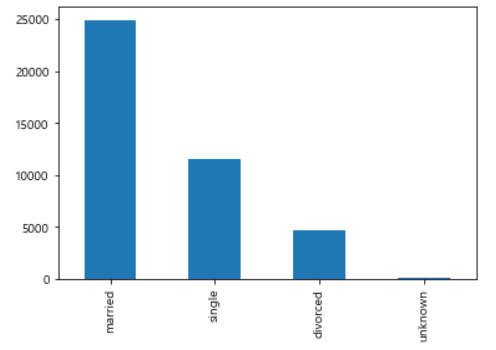

### 막대그래프, 가로막대그래프

In [76]:
# 지금까지는 age, dutraion 을 시각화 해보았는데요
# 이번에는 결혼여부 (marital ) 을 시각화 해보겠습니다

In [77]:
#선그래프
#marital
# df['marital'].plot()  #  ★에러 발생한다★
#no numeric data to plot

TypeError: no numeric data to plot

In [78]:
#히스토그램
# df['marital'].plot.hist()  # ★에러 발생한다★
#no numeric data to plot

TypeError: no numeric data to plot

In [79]:
# 에러가 발생하는 이유를 파악해보자

In [80]:
#unique()함수를 사용한 age칼럼 고유값 확인 
df['age'].unique()
#선그래프를 그린 age칼럼 데이터는 수치데이터

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [24]:
#unique()함수를 사용한 marital칼럼 고유값 확인 
df['marital'].unique()
#marital칼럼의 데이터는 문자다! --> 시각화 불가

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [82]:
#unique()함수를 사용한 education칼럼 고유값 확인 
df['education'].unique()
#education칼럼의 데이터는 문자다! --> 시각화 불가

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

#### 위와 같은 문자 데이터를 막대그래프를 통한 시각화 해보자
 1. value_counts
 2. 막대그래프 시각화

In [84]:
#1. value_counts()
#marital
marital = df['marital'].value_counts()
marital

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

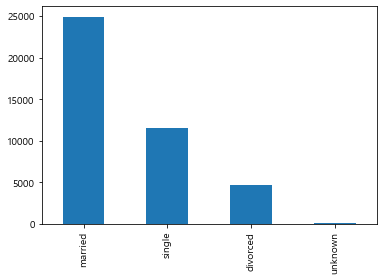

In [85]:
#2. marital변수 막대그래프 시각화
marital.plot.bar()
plt.show()

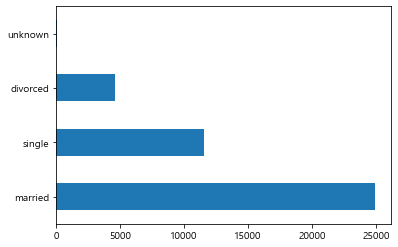

In [87]:
#2-1. 가로막대그래프 시각화
marital.plot.barh()
plt.show()

# 4_2. 교육수준에 따른 통계
- 교육수준 (education) 에 따른 분포 시각화 하기

[예시]
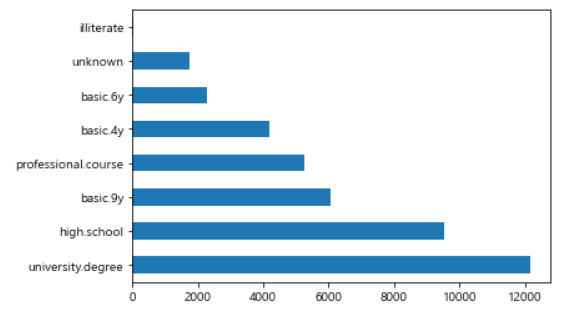

In [89]:
#education 가로막대그래프 한줄 코드
#value_counts(),plot.barh()

df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

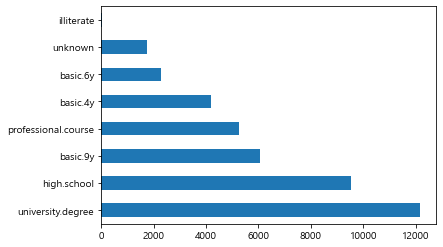

In [90]:
df['education'].value_counts().plot.barh()
plt.show()

----
# 데이터 분석

In [93]:
# 본격적으로 고객데이터 분석을 해보도록 하겠습니다

# ↓ 첫번째 분석주제를 살펴 보겠습니다

## 분석주제 1 :
### 가설 : "대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다."

> 충분히 위와 같은 생각을 해볼수 있다. 그러나 이것은 '생각' '감' 이다.  이러한 가설을 '데이터' 적으로 검증하고 코딩으로 확인 가능할까?

- 학습목표 : 
 1. 가설검증과정 코딩 실습하기
 2. groupby활용한 실습 진행하기

In [94]:
# 분석과정에 대해 .. '어떻게 코딩을 진행해야 하나?'  먼저 생각해보자

- 분석을 위한 코딩과정 도식화
 1. **가입여부**(y)에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
 2. 나뉜 데이터를 **대출여부(loan)**에 따라 나눈다.
 3. **'가입한 그룹 중 대출이 있는 사람의 비중'** 과, **'가입하지 않은 그룹 중 대출이 있는 사람의 비중'** 을 비교한다.
 
 <br><br>


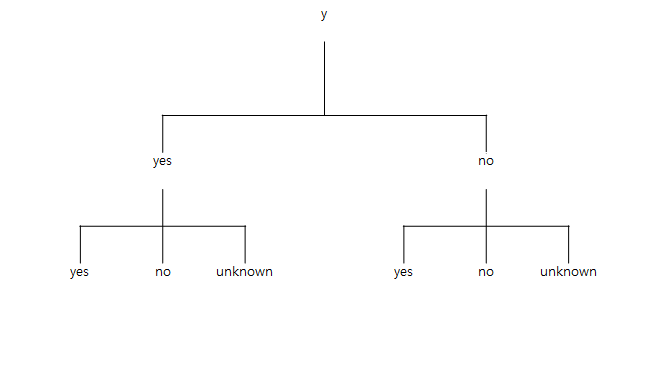

# 5_1. 은행상품 가입여부('y') 에 따라 그룹 나누기
- 가입한 그룹은 yes_group 에 저장하고 확인하기
- 가입하지 않은 그룹은 no_group에 저장하고 확인하기

[예시]
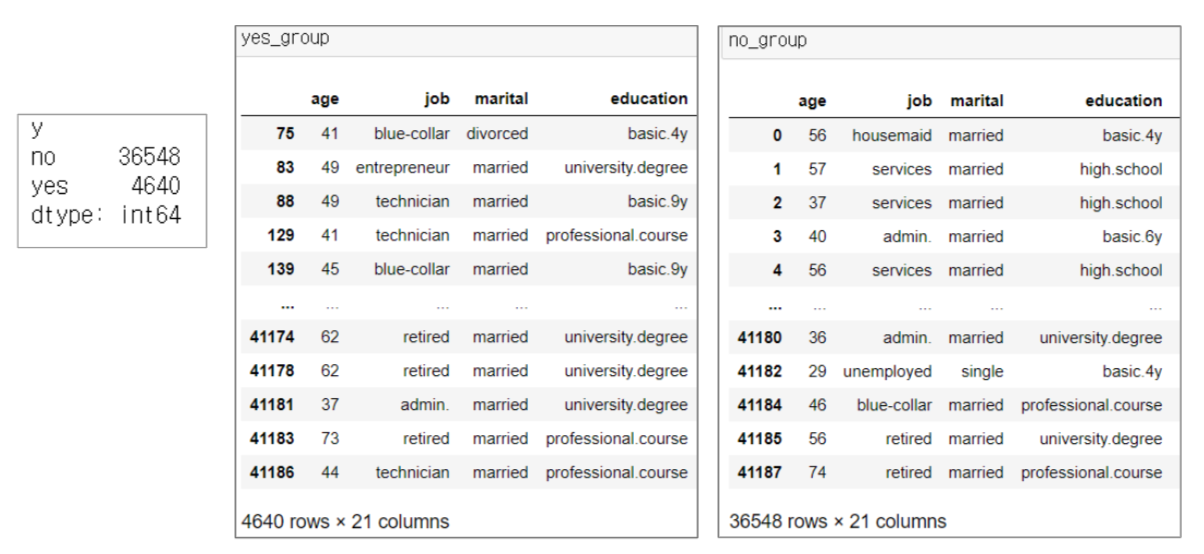

In [ ]:
# TODO

# yes_group = 
# no_group = 

#### 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.

In [25]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#가입여부에 대한 칼럼 : 'y'
#unique()
df['y'].unique()
#groupby사용 하면- yes, no그룹으로 나뉘게 될것이다

array(['no', 'yes'], dtype=object)

In [26]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#groupby('y')

grouped = df.groupby('y')
grouped.size()

y
no     36548
yes     4640
dtype: int64

In [27]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#get_group('yes') - y칼럼이 'yes'인 데이터프레임 추출 - 가입한 그룹만 추출 
#get_group('no') - y칼럼이 'no'인 데이터프레임 추출 - 가입하지 않은 그룹만 추출

yes_group = grouped.get_group('yes')
yes_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [28]:
no_group = grouped.get_group('no')
no_group

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [29]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#yes_group 출력
yes_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [30]:
# 1-3. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#no_group 출력
no_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.

In [31]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts
yes_group['loan']  # 대출여부 확인

75       no
83       no
88       no
129      no
139      no
         ..
41174    no
41178    no
41181    no
41183    no
41186    no
Name: loan, Length: 4640, dtype: object

In [32]:
yes = yes_group['loan'].value_counts()

In [33]:
#yes변수 출력
yes
#yes_group의 대출여부 빈도 출력 
# 즉 '은행상품 가입한 사람' 중에서 '대출여부' 를 빈도를 확인할수 있다

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [34]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts

no = no_group['loan'].value_counts()


In [35]:
#no변수 출력
no
#no_group의 대출여부 빈도 출력
# 즉 '은행상품 가입하지 않은 사람' 중에서 '대출여부' 를 빈도를 확인할수 있다

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [111]:

# 그러나... 숫자만 있으니까 '비중' 을 알수 없습니다
# 그렇다면,
# Series 각각의 value 를 Series 총합으로 나누면 알수 있다.

# 5_2 가설 검증하기
- 위에서 나뉜 은행상품가입자 와 은행상품 비가입자 의 대출여부 (loan) 의 '비중(%)'을 분석하여 결과를 내세요
- 결과에 따른 가설검증 분석 별도의 셀에 작성하세요

[결과예시]
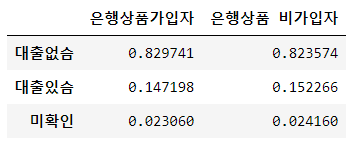

#### 3. **가입한 그룹 내 대출이 있는 사람의 비중** 과, **가입하지 않은 그룹 내 대출이 있는 사람의 비중** 을 비교한다(yes_group).

In [36]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(yes_group).
# 비중 : 시리즈 변수 각각의 value를 시리즈의 총합으로 나눔
# 시리즈는 산술연산자(+,-,*,/,%,**,//)와 함께 사용가능
# series/series.sum()

yes
yes.sum()
yes / yes.sum()
yes = yes / yes.sum()

In [47]:
#yes 출력
yes  # '비중' 확인

# 즉 '은행상품 가입한 사람' 중에서 '대출여부' 를 '비중'를 확인할수 있다  

no         0.829741
yes        0.147198
unknown    0.023060
Name: y_yes, dtype: float64

In [48]:
yes.sum() # (합하면 1이 나와야 한다.)

1.0

In [38]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(no_group).
no
no.sum()
no / no.sum()
no = no / no.sum()

In [39]:
#no 출력
no

# 즉 '은행상품 가입하지 않은 사람' 중에서 '대출여부' 를 '비중'를 확인할수 있다  

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [123]:
# 위와 같이 할수도 있긴 한데, 좀더 자세히 하기 위해서 concat 함수를 사용해보겠습니다

In [40]:
#3. 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.
#concat : 시리즈 혹은 데이터프레임 결합(default-행방향 결합)

pd.concat([yes,  no])  # 행방향 결합 axis = 0

no         0.829741
yes        0.147198
unknown    0.023060
no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [49]:
# 우리는 '열방향 axis=1' 으로 결합해보겠습니다
pd.concat([yes,  no], axis=1)

#칼럼명이 모두 loan

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [42]:
#series.name : 시리즈의 이름 설정
yes.name

'loan'

In [50]:
yes.name = '은행상품가입자'

In [44]:
#series.name : 시리즈의 이름 설정
no.name

'loan'

In [51]:
no.name = '은행상품 비가입자'

In [54]:
# 이제 다시 concat 을 진행해보자

result_df = pd.concat([yes,  no], axis=1)
result_df

,은행상품가입자,은행상품 비가입자
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [55]:
result_df.index

Index(['no', 'yes', 'unknown'], dtype='object')

In [56]:
result_df.index = ['대출없슴', '대출있슴', '미확인']
result_df

,은행상품가입자,은행상품 비가입자
대출없슴,0.829741,0.823574
대출있슴,0.147198,0.152266
미확인,0.023060,0.024160


In [134]:
# ↑ 결과
#=> 은행상품 가입한 그룹의 대출 비중이 가입하지 않은 그룹보다 0.005 더 적다.  (생각. 예측)

# 분석주제    "대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다."

# (생각, 예측) 대로 의 결과는 보이고 있다.

# 그러나! 그 영향은 크지 않다! 0.005 정도 밖에는 안된다!!! <-- 생각이 100% 맞았다고 보기도 어렵다.

---
# 분석주제 2 :
### 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
### 연령(age)과 상품가입여부(y), 직업(job)을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?

- 목표 : 
 1. 가설검증과정 코딩 실습하기
 2. pivot_table활용한 실습 진행하기
 
 
- 분석조건 : 세 개의 칼럼(age, job, y)을 함께 분석해야 함  

In [63]:
"""
pd.pivot_table(
    data,        ← 데이터프레임 변수      
    values=None,  ← 집계대상 칼럼 (수치데이터)
    index=None,    ← 행 인덱스가 될 칼럼명
    columns=None,  ← 열 인덱스가 될 칼럼명
    aggfunc='mean',  ← 집계함수-sum,mean,min,max,std,var
    fill_value=None,     ← 결측치를 다른 값으로 채우기
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
) -> 'DataFrame'
"""
None

In [135]:
# 우선 pivot_table 사용예제를 알아보겠습니다

# pivot_table 사용예제

In [57]:
#pd.pivot_table('데이터프레임 변수',values=집계 대상 칼럼, index=행 인덱스가 될 칼럼명, columns=열 인덱스가 될 칼럼명, aggfunc=sum)
pd.pivot_table(df, values='age', index='y', columns='job', aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [58]:
#values,index,columns파라미터를 일일이 쓰지 않고 순서대로 입력하여 실행 가능
pd.pivot_table(df, 'age', 'y', 'job', 'mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [59]:
#멀티 인덱스(multi-index) - 행 인덱스     하나 이상의 인덱스 지정 가능하다
#['y','marital']
pd.pivot_table(df, 'age', ['y','marital'], 'job', 'mean')

job              admin.  blue-collar  entrepreneur  housemaid  management  \
y   marital                                                                 
no  divorced  43.098432    42.903704     44.042424  48.806897   46.123288   
    married   40.148663    40.857804     42.477111  44.849218   43.634997   
    single    33.858265    33.409255     35.472527  38.087379   34.070776   
    unknown   34.666667    42.818182     35.500000  40.000000   51.000000   
yes divorced  44.878788    42.037736     44.857143  57.000000   46.692308   
    married   41.386503    41.363420     43.090909  54.256757   44.756637   
    single    32.404594    32.652174     35.666667  40.875000   33.285714   
    unknown   42.500000    37.000000     31.000000        NaN         NaN   

job             retired  self-employed   services    student  technician  \
y   marital                                                                
no  divorced  61.480469      42.871795  41.991984  34.500000   42.173484   
    married   60.019048      42.349148  39.992951  30.484848   40.686245   
    single    53.938272      33.783537  32.159921  26.062500   33.950697   
    unknown   59.750000      39.400000  40.000000  30.000000   33.300000   
yes divorced  72.739130      41.875000  43.484848  35.666667   40.738462   
    married   67.033435      41.036585  38.379518  31.250000   41.398438   
    single    67.500000      31.921569  31.024194  24.481061   32.078853   
    unknown   66.000000            NaN        NaN        NaN   30.000000   

job           unemployed    unknown  
y   marital                          
no  divorced   42.140351  43.300000  
    married    41.636861  47.532110  
    single     33.536946  38.288136  
    unknown    47.200000  40.166667  
yes divorced   47.900000  76.333333  
    married    41.941860  58.750000  
    single     32.062500  30.000000  
    unknown          NaN  40.666667

In [60]:
#멀티 인덱스(multi-index) - 열 인덱스 도 여러가지로 구성가능
#['job','contact']
pd.pivot_table(df, 'age', ['y','marital'], ['job','contact'], 'mean')

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000        NaN   37.000000        NaN    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000        NaN        NaN  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown         NaN        NaN        NaN        NaN        NaN  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000        NaN  30.285714   
yes divorced  43.083333  44.555556  35.666667        NaN  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown         NaN        NaN        NaN        NaN  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333        NaN  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown         NaN        NaN        NaN  45.000000  32.000000  

[8 rows x 24 columns]

In [61]:
# ↑ 관찰
#  원본데이터를 잘게잘게 쪼개다 보니까
#  결측치 NaN 이 발생하는 것들을 볼수 있다!!

# 결측치를 다른 기본값등으로 대체 하려면?

In [62]:
#fill-value - 결측치 대체
#fill_value=0
pd.pivot_table(df, 'age', ['y','marital'], ['job','contact'], 'mean', fill_value=0)

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000   0.000000   37.000000   0.000000    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000   0.000000   0.000000  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown    0.000000   0.000000   0.000000   0.000000   0.000000  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000   0.000000  30.285714   
yes divorced  43.083333  44.555556  35.666667   0.000000  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown    0.000000   0.000000   0.000000   0.000000  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333   0.000000  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown    0.000000   0.000000   0.000000  45.000000  32.000000  

[8 rows x 24 columns]

In [144]:
# 이상으로 pivot 테이블을 다시 복습 해보았고
# 지금부터는 본격적으로 pivot table 을 사용한 분석을 해보도록 하겠습니다.

# pivot_table를 사용한 주제2 분석
#### 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
#### 연령(age)과 상품가입여부(y), 직업(job)을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?


# 6_1. 은행상품 가입여부 (‘y’) 에 따른 직업(job)별  ‘평균’ 나이(age) 를 pivot table 로 작성해보세요
- 작성한 pivot table (은) pivot 이라는 변수에 담아두세요

[예시]
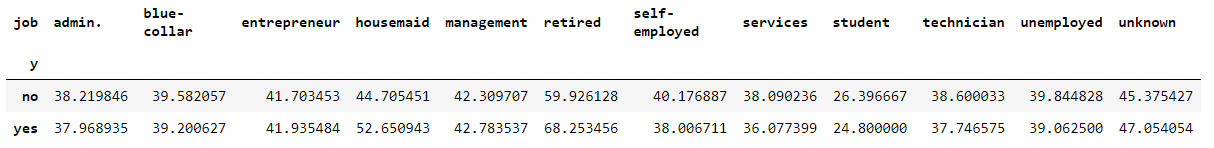

In [145]:
#pivot_table
pivot = pd.pivot_table(df, values='age', index='y', columns='job', aggfunc='mean')

In [146]:
#pivot 변수 출력
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [148]:
# ↑  관찰
#  위에서 y (yes) 와 (no) 그룹의 연령의 차를 확인해볼수 있다.

# 6_2. 평균연령의 차이 분석해보기
1. 위 결과 (pivot) 에서 
    - **평균연령차 : 은행상품 가입자 평균연령 - 비가입자 평균연령**
    - 위 평균연령 차를 계산하여 새로운 row 추가하기 (새 인덱스 : **diff**)
1. diff 순으로 내림차순 정렬하기
1. 분석결과를 result 변수에 담기 (DataFrame)
1. 분석결과에 기반하여 마케팅 을 집중해야 할 그룹에 대한 견해를 별도의 셀에 남겨보세요

[예시]
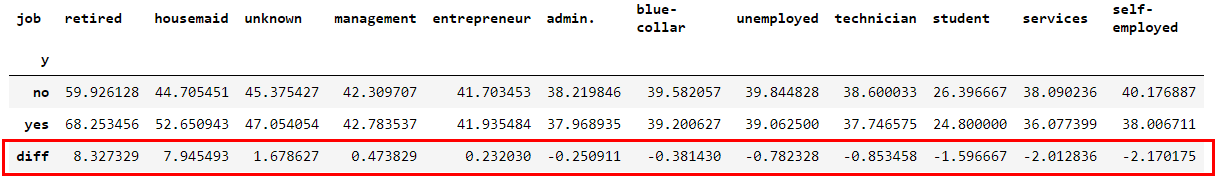

In [147]:
#yes행과 no행의 차 연산(loc인덱서 사용)
pivot.loc['yes'] - pivot.loc['no']

job
admin.          -0.250911
blue-collar     -0.381430
entrepreneur     0.232030
housemaid        7.945493
management       0.473829
retired          8.327329
self-employed   -2.170175
services        -2.012836
student         -1.596667
technician      -0.853458
unemployed      -0.782328
unknown          1.678627
dtype: float64

In [149]:
#diff행 생성(yes행과 no행의 차)
pivot.loc['diff'] = pivot.loc['yes'] - pivot.loc['no']

In [150]:
#pivot 변수 출력
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [151]:
# ↑ 결과
# diff 값 행 추가...   그러나  분석을 위해선 정렬을 해주면 좋을 듯하다.

In [163]:
#diff 기준으로 내림차순 정렬 
#sort_values() - default : 열 기준 오름차순 정렬
#axis=1,ascending=False : 행 기준 내림차순 정렬

In [165]:
# pivot.sort_values(['admin'])  # 안된다... 음

In [161]:
result = pivot.sort_values('diff', axis=1, ascending=False)

In [162]:
#result 출력
result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


In [167]:
# ↑ 결과 관찰
#  yes (은행상품 가입한 그룹) 과 no (가입하지 않은 그룹) 으로 나누고
#  이를 집업(job)별로 나누어 보았다
#  retired 그룹이 은행상품 가입한 그룹과 그렇지 않은 그룹간 연령의 차가 가장 크게 나타남.  (8.327329)
#  그 다음에 차이 나는 것은 housemaid  (7.945493)
#  그 이후부터는 연령차이가 얼마 나지 않음을 알수 있다.

# 이 데이터 분석을 가지고 다시 마케팅 캠페인을 진행한다고 하면!
# "retired 와 housemaid 에 대해서는 더욱더 연령을 높여서 마케팅 해봐야 겠다" 라는 식의 분석 결과를 얻을수 있다. 

# 이상으로 분석주제2에 대해 분석을 해보았습니다

# 6_3. 위 분석결과 시각화 하기 

[예시]
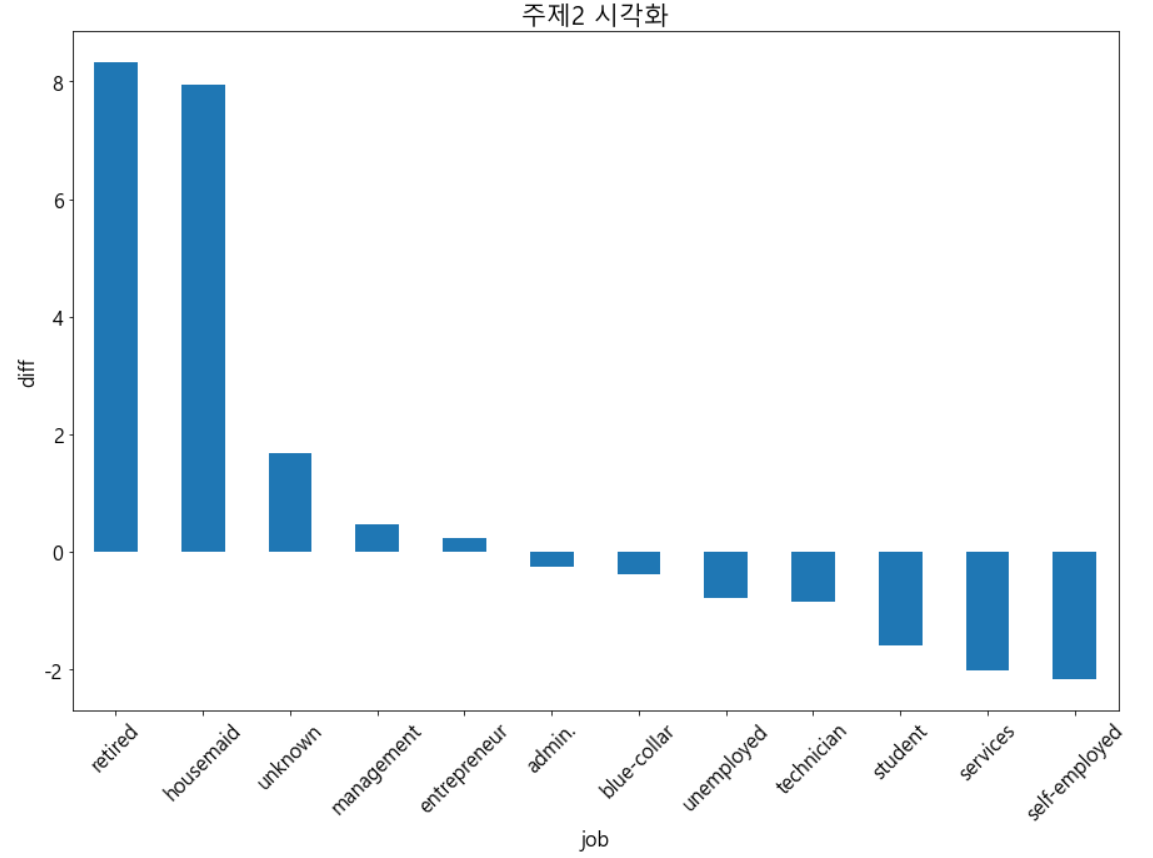

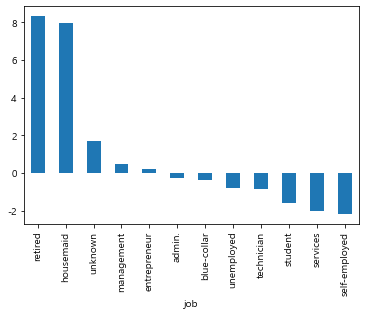

In [168]:
#result의 diff행 막대그래프 시각화
result.loc['diff'].plot.bar()
plt.show()

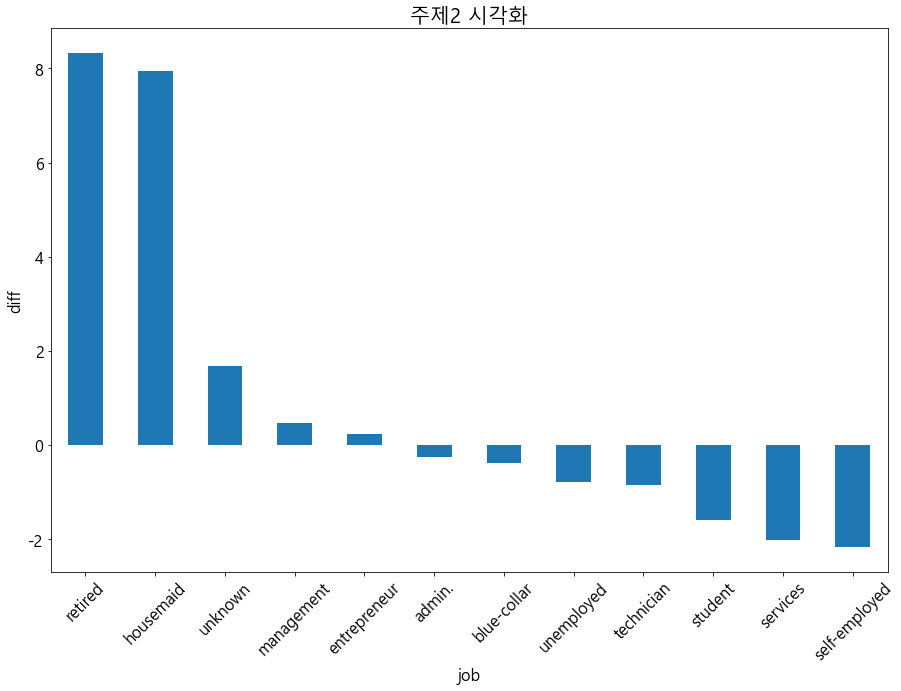

In [171]:
#result의 diff행 막대그래프 시각화
#figsize=[15,10]
#title('주제2 시각화',fontsize=20)
#x축 눈금 - fontsize=16,rotation=45
#y축 눈금 - fontsize=16)
#xlabel - 'job',fontsize=16
#ylabel - 'diff',fontsize=16

result.loc['diff'].plot.bar(figsize=[15,10])
plt.title('주제2 시각화',fontsize=20)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('job',fontsize=16)
plt.ylabel('diff',fontsize=16)
plt.show()

In [172]:
# 이상 분석주제 2 까지 해보았습니다

In [ ]:
# 이 강의를 통해서
# 파이썬 기본기가 튼튼해졌으면 좋겠습니다.